In [1]:
import rasterio
import numpy as np
import os
import glob
from os import listdir
from os.path import isfile, join
import re
from matplotlib import pyplot

In [2]:
# Load 'Prob_Image' class that was defined in ProbImage_CLass.ipynb
%run ProbImage_Class.ipynb

## explore the threshold a littble bit

In [3]:
test1 = Prob_Image('/media/sitian/HDD1/BULCU_TIFFS/BULCU_grid2500_2016backward/BULCU-all_2016_backward/grid_1766_BULCU.tif')

In [4]:
test1.init_crop_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

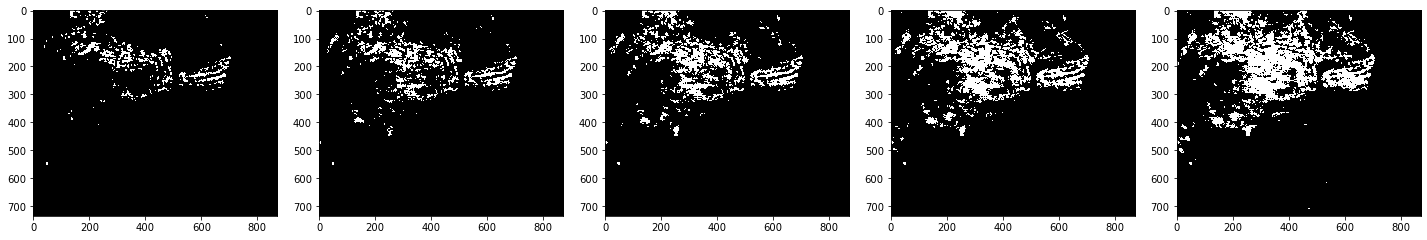

In [5]:
fig, axs = pyplot.subplots(1, 5,figsize = [20,10]) # row, col
subplt_title_size = 20
pyplot.subplots_adjust(bottom=0.1, top=1, hspace=0)
pyplot.tight_layout()
#fig.set_size_inches(20.5, 12.5)
axs[0].imshow(test1.mask_of_slope(-0.03), cmap='Greys_r')
axs[1].imshow(test1.mask_of_slope(-0.02), cmap='Greys_r')
axs[2].imshow(test1.mask_of_slope(-0.015), cmap='Greys_r')
axs[3].imshow(test1.mask_of_slope(-0.01), cmap='Greys_r')
axs[4].imshow(test1.mask_of_slope(-0.005), cmap='Greys_r')

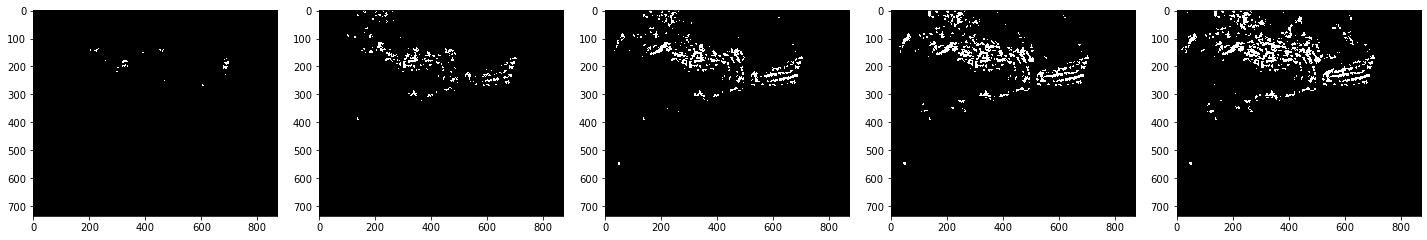

In [6]:
fig, axs = pyplot.subplots(1, 5,figsize = [20,10]) # row, col
subplt_title_size = 20
pyplot.subplots_adjust(bottom=0.1, top=1, hspace=0)
pyplot.tight_layout()
#fig.set_size_inches(20.5, 12.5)
axs[0].imshow(test1.mask_of_endprob(0.2)*test1.init_crop_mask, cmap='Greys_r')
axs[1].imshow(test1.mask_of_endprob(0.3)*test1.init_crop_mask, cmap='Greys_r')
axs[2].imshow(test1.mask_of_endprob(0.4)*test1.init_crop_mask, cmap='Greys_r')
axs[3].imshow(test1.mask_of_endprob(0.5)*test1.init_crop_mask, cmap='Greys_r')
axs[4].imshow(test1.mask_of_endprob(0.6)*test1.init_crop_mask, cmap='Greys_r')

## Really start to export 

In [7]:
my_bulcu_path = '/media/sitian/HDD1/BULCU_TIFFS/BULCU_grid2500_2016backward/BULCU-all_2016_backward/'
my_root_path = '/media/sitian/HDD1/BULCU_TIFFS/BULCU_grid2500_2016backward/'
onlyfiles = [f for f in listdir(my_bulcu_path) if isfile(join(my_bulcu_path, f))]
grid_id_list = []
for i in onlyfiles: 
    grid_id = re.search(r'grid_(.*?)_BULCU', i).group(1)
    grid_id_list.append(grid_id)

In [13]:
def export_cropgain(grid_id):
    
    out_fold = 'n0025/'

    bulcu = Prob_Image(join(my_bulcu_path,'grid_'+grid_id+'_BULCU.tif'))
    bulcu.mask_of_slope(-0.025)
    bulcu.generic_export(image_type='slope_mask', 
                         out_path='/media/sitian/HDD1/BULCU_TIFFS/BULCU_grid2500_2016backward/crop_gain_'+out_fold,
                         out_name='crop_gain_grid'+grid_id+'.tif')

In [108]:
export_cropgain('1419')

In [14]:
from multiprocessing import Pool

with Pool(6) as p:
    p.map(export_cropgain, grid_id_list[:])
print('done')

done
